In [1]:
import folium

print(folium.__file__)
print(folium.__version__)

/home/filipe/.virtualenvs/iris/lib/python2.7/site-packages/folium/__init__.py
0.1.6


In [2]:
import numpy.ma as ma
import matplotlib.pyplot as plt

from scipy.io import loadmat


def colorize(array, cmap='rainbow'):
    normed_data = (array - array.min()) / (array.max() - array.min())
    cm = plt.cm.get_cmap(cmap)
    return cm(normed_data)


merc = loadmat('./data/mercator_temperature.mat', squeeze_me=True)
x, y = merc['x'], merc['y']
level = 10  # 10 meters temperature.
data = ma.masked_invalid(merc['temp'][level, ...])

colored_data = colorize(data, cmap='rainbow')


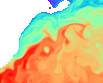

In [3]:
import numpy as np
from datetime import datetime

mapa = folium.Map(location=[y.mean(), x.mean()], zoom_start=5)

mapa.image_overlay(np.flipud(colored_data),
                   min_lat=y.min(), max_lat=y.max(),
                   min_lon=x.min(), max_lon=x.max(),
                   image_opacity=0.5)


jd_now = datetime.utcnow()
mapa.add_tile_layer(tile_name='hfradar 2km',
                    tile_url=('http://hfradar.ndbc.noaa.gov/tilesavg.php?'
                              's=10&e=100&x={x}&y={y}&z={z}&t=' +
                              str(jd_now.year) + '-' + str(jd_now.month) +
                              '-' + str(jd_now.day) + ' ' +
                              str(jd_now.hour-2) + ':00:00&rez=2'))

mapa.add_layers_to_map()

mapa.create_map("mapa.html")
mapa